In [2]:
import pandas as pd
from pathlib import Path

import scienceplots
import matplotlib.pyplot as plt

plt.style.use(['science', 'nature'])

In [57]:
# data_path = Path("/Users/fuchur/Documents/22/git_sync/gnn-tracking-experiments/data/vis_230201")

In [58]:
# dfs = []
# for f in data_path.glob("*.csv"):
#     dfs.append(pd.read_csv(f))

In [87]:
results = [{
 'trk.perfect_pt0.5': 0.4324355930142834,
 'trk.perfect_pt0.9': 0.7155337707692274,
 'trk.perfect_pt1.5': 0.69919534378765,
}, {
 'trk.lhc_pt0.5': 0.9690448834868437,
 'trk.lhc_pt0.9': 0.9725341040154258,
 'trk.lhc_pt1.5': 0.9713515320727193,},{
 'trk.double_majority_pt0.5': 0.599925228442039,
 'trk.double_majority_pt0.9': 0.9158235409894253,
 'trk.double_majority_pt1.5': 0.9070813862441779,
 }]

In [88]:
dfs = [pd.DataFrame({k: v for k, v in r.items()}, index=[0]) for r in results]

In [89]:
def get_keys_values(df):
    dct = df.to_dict()
    dct = {key: value[0] for key, value in dct.items() if not key in ["Name", "_wandb"]}
    keys = sorted(dct.keys())
    return keys, [dct[k] for k in keys]

In [90]:
import matplotlib.pyplot as plt
import numpy as np

In [131]:
def plot_from_df(df, title, xlabel, lim=None):
    fig, ax = plt.subplots(dpi=250, figsize=(3, 2))
    keys, values = get_keys_values(df)
    keys = list(reversed([r"$p_T\geq 1.5$ GeV", r"$p_T\geq 0.9$ GeV", r"$p_T\geq 0.5$ GeV", r"$p_T\geq 0$ GeV"]))

    keys = keys[2:]
    values = values[1:]
    y_pos = np.arange(len(keys))

    print(keys, values, y_pos)

    for y, v in zip(y_pos, values):
        print(y, v)
        plt.text(v/2, y, str(int(round(100*v, 0)))+"\%", color='white', ha="center", va="center", weight="bold", fontsize=9)


    ax.barh(y_pos, values, align='center', color="#e77500")
    if lim:
        ax.set_xlim(None, lim)
    ax.set_yticks(y_pos, labels=keys)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

In [132]:
# plot_from_df(df, "Double Majority Fake Rate", "Fake Rate")

In [133]:
# plot_from_df(dfs[0], "Perfect Efficiencies", "Efficiency", lim=1)

['$p_T\\geq 0.9$ GeV', '$p_T\\geq 1.5$ GeV'] [0.9725341040154258, 0.9713515320727193] [0 1]
0 0.9725341040154258
1 0.9713515320727193


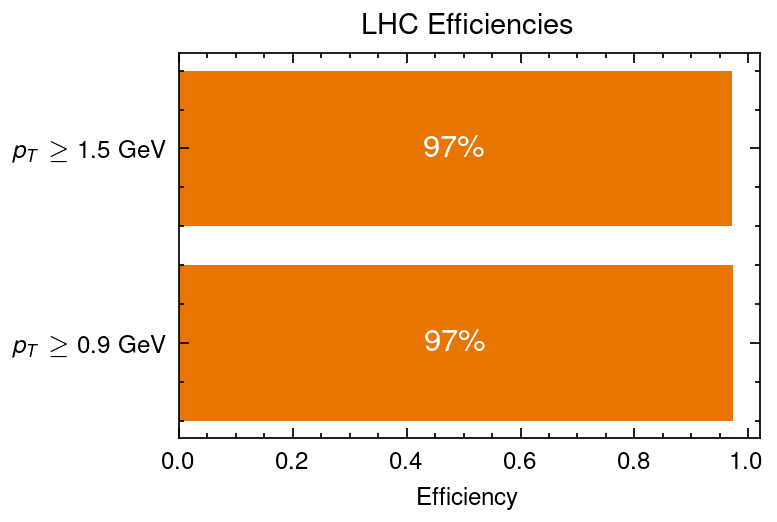

In [134]:
plot_from_df(dfs[1], "LHC Efficiencies", "Efficiency")

['$p_T\\geq 0.9$ GeV', '$p_T\\geq 1.5$ GeV'] [0.9158235409894253, 0.9070813862441779] [0 1]
0 0.9158235409894253
1 0.9070813862441779


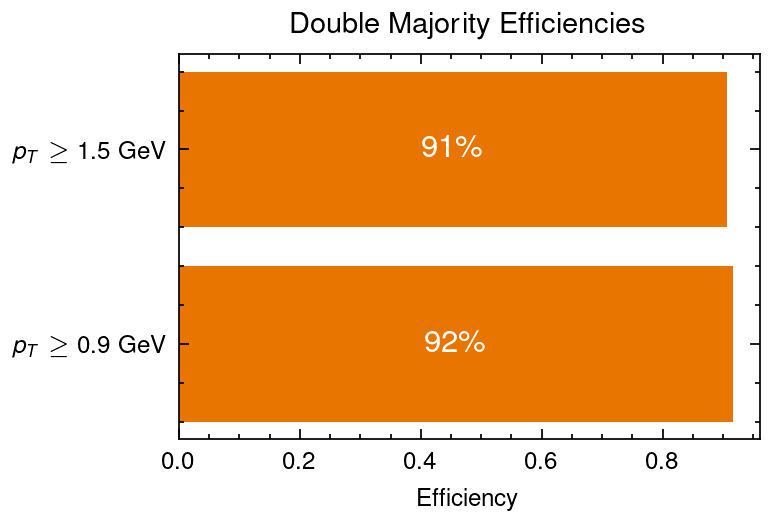

In [135]:
plot_from_df(dfs[2], "Double Majority Efficiencies", "Efficiency")

['$p_T\\geq 0.9$ GeV', '$p_T\\geq 1.5$ GeV'] [0.7155337707692274, 0.69919534378765] [0 1]
0 0.7155337707692274
1 0.69919534378765


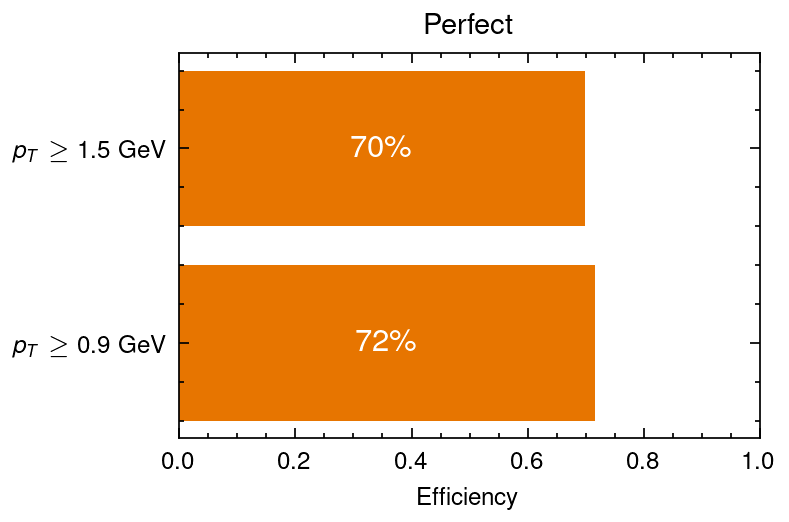

In [137]:
plot_from_df(dfs[0], "Perfect", "Efficiency", lim=1)